### 가족 앨범 AI

##### 1. 구성원별 안면 사진 등록

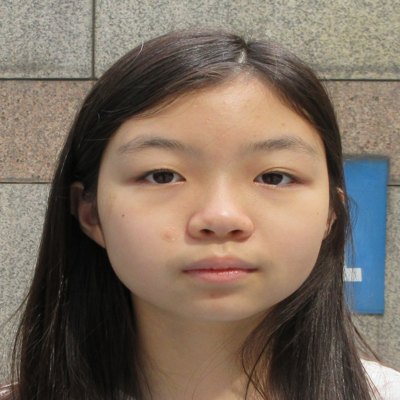

daughter1


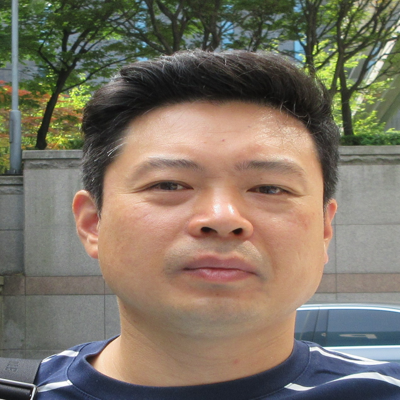

father


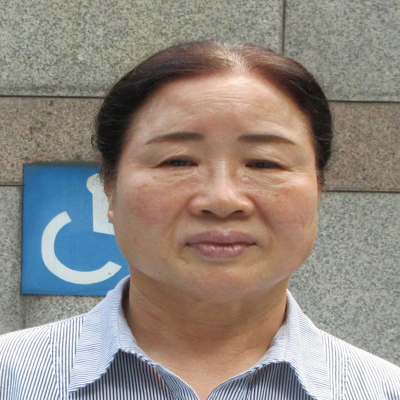

grandmother


In [57]:
# 안면 이미지 

from PIL import Image
from glob import glob
from IPython.display import display 

root  = 'data/family(proto)/'

indivisual_dir = root+'indivisual/'
indivisual_imgs = glob(indivisual_dir+'*.jpg')
member_id = ['daughter1','father','grandmother']

for idx,indivisual_img in enumerate(indivisual_imgs):
    image = Image.open(indivisual_img)
    image = image.resize((400,400))

    display(image)
    print(member_id[idx])

In [58]:
# 안면별 벡터 추출

from face_recognition import face_recognition
import numpy as np

indivisual_imgs = glob(indivisual_dir+'*.jpg')
# print(indivisual_imgs)
member_encoding = []
member_id = ['daughter1','father','grandmother']

for indivisual_img in indivisual_imgs:
    indivisual_img = face_recognition.load_image_file(indivisual_img)
    encoding = face_recognition.face_encodings(indivisual_img)[0]
    member_encoding.append(encoding)

print(np.shape(member_encoding))

(3, 128)


In [76]:
# 안면 추출 확인

from PIL import Image, ImageDraw, ImageFont

def check_face(indivisual_imgs,member_id,member_encoding):

    for indivisual_img in indivisual_imgs:
        # Load an image with an unknown face
        unknown_image = face_recognition.load_image_file(indivisual_img)

        # Find all the faces and face encodings in the unknown image
        face_locations = face_recognition.face_locations(unknown_image)
        face_encodings = face_recognition.face_encodings(unknown_image, face_locations)

        # Convert the image to a PIL-format image so that we can draw on top of it with the Pillow library
        # See http://pillow.readthedocs.io/ for more about PIL/Pillow
        pil_image = Image.fromarray(unknown_image)
        # Create a Pillow ImageDraw Draw instance to draw with
        draw = ImageDraw.Draw(pil_image)

        # Loop through each face found in the unknown image
        for (top, right, bottom, left), face_encoding in zip(face_locations, face_encodings):
            # See if the face is a match for the known face(s)
            matches = face_recognition.compare_faces(member_encoding, face_encoding)

            name = "Unknown"

            # Or instead, use the known face with the smallest distance to the new face
            face_distances = face_recognition.face_distance(member_encoding, face_encoding)
            best_match_index = np.argmin(face_distances)
            if matches[best_match_index]:
                name = member_id[best_match_index]

            # Draw a box around the face using the Pillow module
            draw.rectangle(((left, top), (right, bottom)), outline=(0, 0, 255))

            # Get the size of the text
            text_bbox = draw.textbbox((left, top), name, font=ImageFont.truetype("arial.ttf", 200))
            text_width = text_bbox[2] - text_bbox[0]
            text_height = text_bbox[3] - text_bbox[1]

            # Define the padding for the text box
            padding = 50

            font = ImageFont.load_default()  # 이 부분에서 사용할 폰트를 선택하거나 적절한 폰트 파일을 로드할 수 있습니다.
            font_size = 120  # 원하는 폰트 크기를 지정하세요.
            
            # Draw a label with a name above the face with the specified font and font size
            draw.rectangle(((left, top - text_height - padding, right + padding, top - padding)), fill=(0, 0, 255), outline=(0, 0, 255))
            draw.text((left + padding, top - text_height - padding), name, fill=(255, 255, 255, 255), font=ImageFont.truetype("arial.ttf", font_size))  # 폰트 크기를 지정합니다.

        # Remove the drawing library from memory as per the Pillow docs
        del draw
        pil_image = pil_image.resize((400,400))

        # Display the resulting image
        display(pil_image)


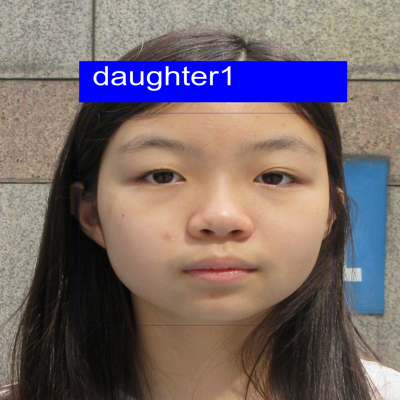

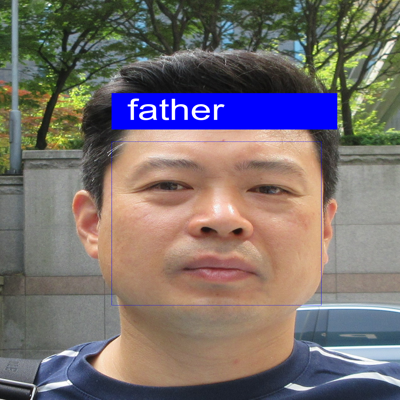

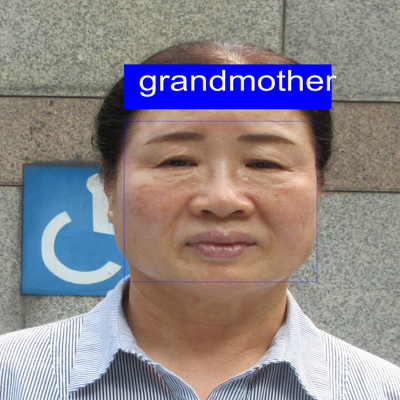

In [77]:
check_face(indivisual_imgs,member_id,member_encoding)

##### 2) 가족사진 안면 추출/분류

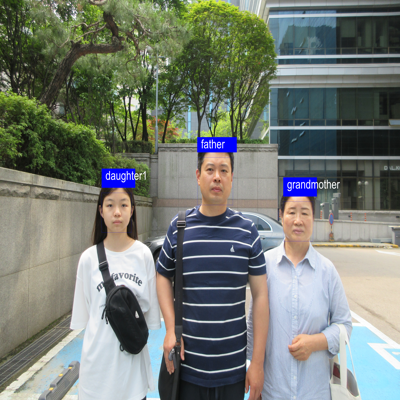

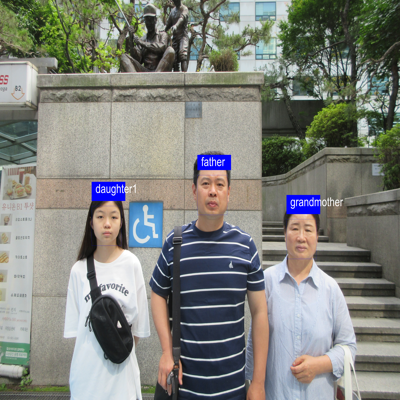

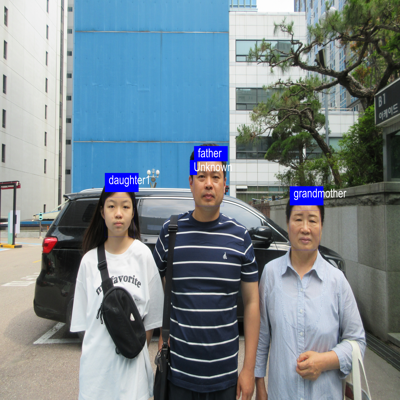

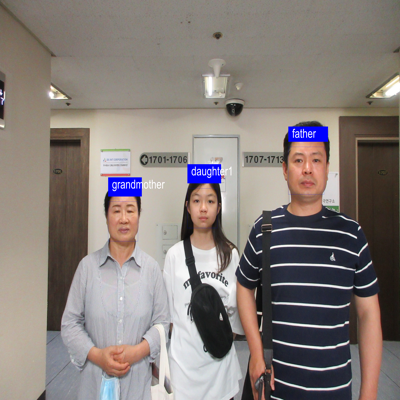

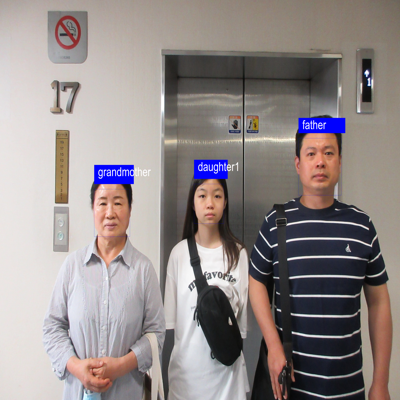

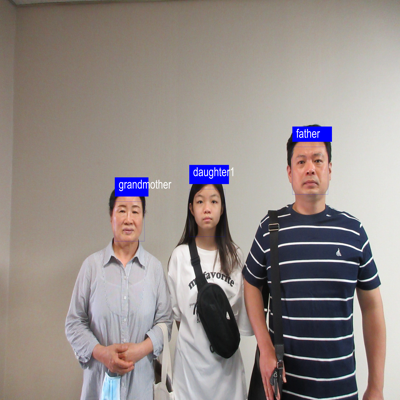

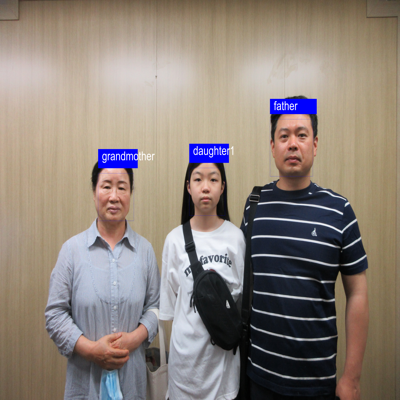

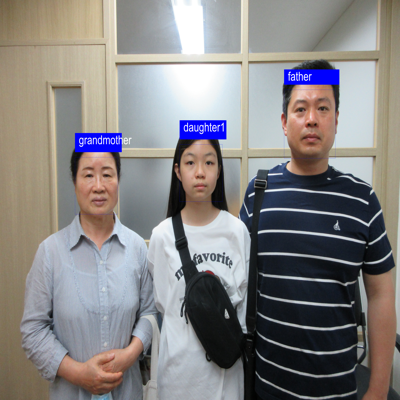

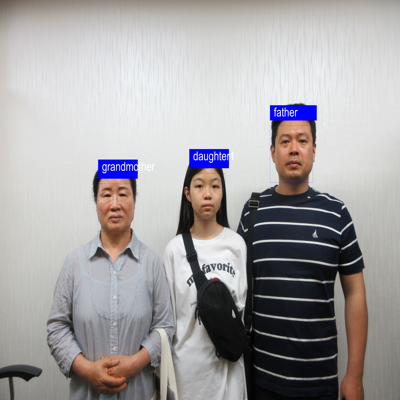

In [78]:
family_dir = root+'family/'
family_imgs = glob(family_dir+'*.jpg')

check_face(family_imgs,member_id,member_encoding)